# Método Variacional de Monte Carlo

## Oscilador armónico en 1 dimensión

Empezamos importando las paqueterías a utilizar

In [1]:
using Random
using Plots

Se define la función donde se aplica el método Monte Carlo para un oscilador de 1 dimensión.

In [13]:
function osc_1d(n)
    x = Vector{Float64}()   #Vector donde se almacena el valor de beta
    var = Vector{Float64}() #Vector donde se almacena la varianza
    en = Vector{Float64}()  #Vector donde se almacena la energía
    v_min=10                # Varianza mínima
    e_min=0                 # Energía mínima
    er_min=0                # Error asociado a la energía mínima
    beta = 0                # Beta asociada amínima
    for b in 0.1:0.025:2
        I = 0
        fsq = 0
        for i in 1:n
            r = (rand((0.1:0.001:1)))
            I += (1/n)*(b + (0.5-2.0*b^2)*r^2)
            fsq += (1/n)*((b + (0.5-2.0*b^2)*r^2))^2
        end
        v = abs(fsq - I*I)
        err = (v/n)^(1/2)
        if v < v_min
            v_min = v
            e_min = I
            er_min = err
            beta = b
        end
        push!(x, b)
        push!(var, v)
        push!(en, I)
    end
    fig1 = plot(x, en, seriestype = :scatter ,fmt = :png, title = "Oscilador armónico en 1 dimensión", legend = false, xlabel = "Beta", ylabel = "Energía de prueba")
    display(fig1)
    fig2 = plot(x, var, seriestype = :scatter ,fmt = :png, title = "Oscilador armónico en 1 dimensión", legend = false, xlabel = "Beta", ylabel = "Varianza")
    display(fig2)
    println("beta min = ", beta)
    print("E min = ", e_min)
    println(" +/- ", er_min)
    println("Var min = ", v_min)
end

osc_1d (generic function with 1 method)

Ejecutamos la función para $n=10000$

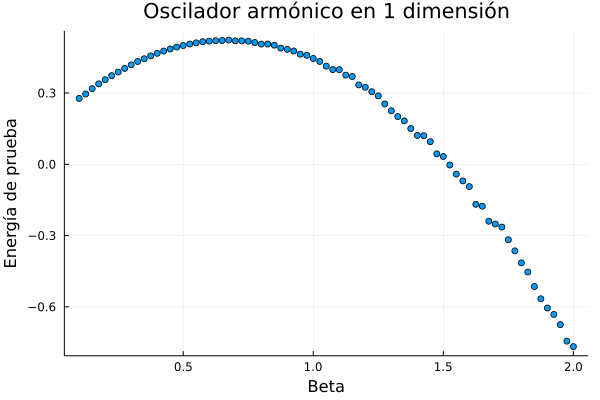

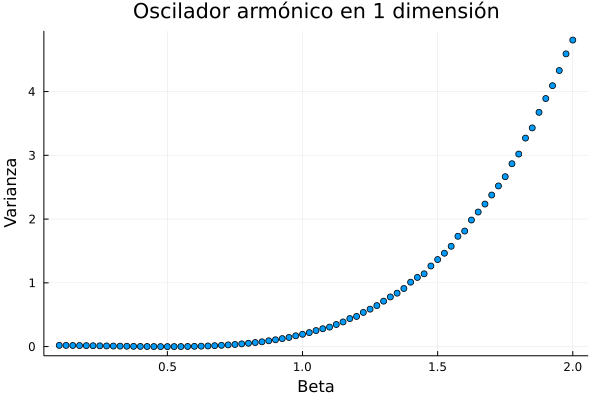

beta min = 0.5
E min = 0.4999999999999531 +/- 1.5314522975008537e-9
Var min = 2.3453461395206432e-14


In [14]:
osc_1d(10000)

Por lo tanto la función de onda es $\psi = e^{\frac{1}{2}x^2}$ con energía $E = 0.4999999999999531 \pm 1.5314522975008537 \times 10^{-9}$

## Oscilador armónico en 3 dimensiones

De manera análoga, definimos el método de Monte Carlo para el oscilador armónico en 3 dimensiones

In [11]:
function osc_3d(n)
    x = Vector{Float64}()
    var = Vector{Float64}()
    en = Vector{Float64}()
    v_min=10
    e_min=0
    er_min=0
    beta = 0
    for b in 0.1:0.05:2
        I = 0
        fsq = 0
        for i in 1:n
            r = (rand((0.1:0.001:1)))
            I += (1/n)*(3b + (0.5-2.0*b^2)*r^2)
            fsq += (1/n)*((3b + (0.5-2.0*b^2)*r^2))^2
        end
        v = abs(fsq - I*I)
        err = (v/n)^(1/2)
        if v < v_min
            v_min = v
            e_min = I
            er_min = err
            beta = b
        end
        push!(x, b)
        push!(var, v)
        push!(en, I)
    end
    fig1 = plot(x, en, seriestype = :scatter ,fmt = :png, title = "Oscilador armónico en 3 dimensiones", legend = false, xlabel = "Beta", ylabel = "Energía de prueba")
    display(fig1)
    fig2 = plot(x, var, seriestype = :scatter ,fmt = :png, title = "Oscilador armónico en 3 dimensiones", legend = false, xlabel = "Beta", ylabel = "Varianza")
    display(fig2)
    println("beta min = ", beta)
    print("E min = ", e_min)
    println(" +/- ", er_min)
    println("Var min = ", v_min)
end

osc_3d (generic function with 1 method)

Ejecutamos la función para $n=10000$

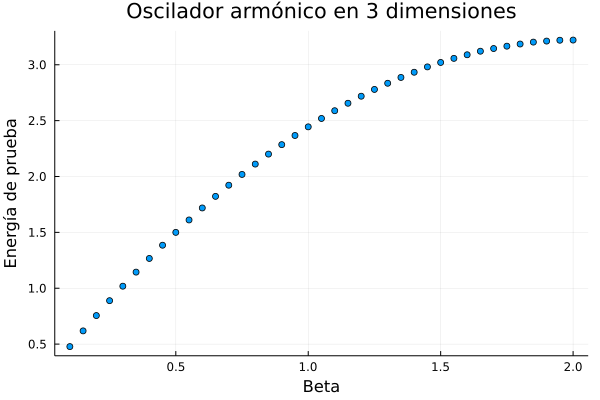

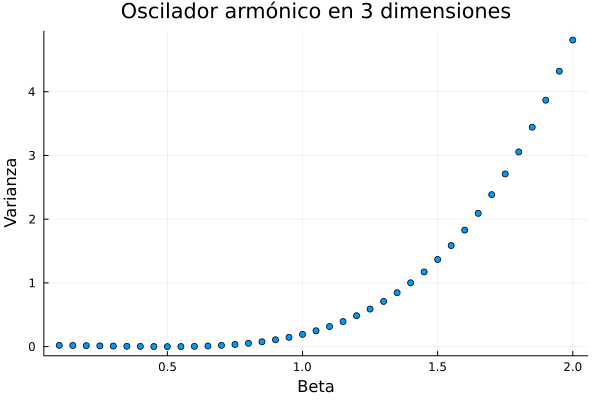

beta min = 0.5
E min = 1.4999999999887617 +/- 8.904762374931055e-9
Var min = 7.929479295398778e-11


In [12]:
osc_3d(1000000)

Por lo tanto la función de onda es $\psi = e^{\frac{1}{2}x^2}$ con energía $E = 1.5000000000002403 \pm 1.059764885109338 \times 10^{-8}$

## Átomo de Helio

In [2]:
function helio(n)
    x = Vector{Float64}()   #Vector donde se almacena el valor de alpha
    var = Vector{Float64}() #Vector donde se almacena la varianza
    en = Vector{Float64}()  #Vector donde se almacena la energía
    v_min=10                # Varianza mínima
    e_min=0                 # Energía mínima
    er_min=0                # Error asociado a la energía mínima
    alpha = 0                # Beta asociada amínima
    for a in 1.3:0.05:2.3
        I = 0
        fsq = 0
        for i in 1:n
            x1 = (rand((0.1:0.001:1)))
            y1 = (rand((0.1:0.001:1)))
            z1 = (rand((0.1:0.001:1)))
            x2 = (rand((0.1:0.001:1)))
            y2 = (rand((0.1:0.001:1)))
            z2 = (rand((0.1:0.001:1)))
            r1 = sqrt(x1^2 + y1^2 + z1^2)
            r2 = sqrt(x2^2 + y2^2 + z2^2)
            r12 = sqrt((x2-x1)^2 + (y2-y1)^2 + (z2-z1)^2)
            I += (1/n)*(-a^2+(a/r1)+(a/r2)-(2/r1)-(2/r2)+(1/r12))
            fsq += (1/n)*((-a^2+(a/r1)+(a/r2)-(2/r1)-(2/r2)+(1/r12)))^2
        end
        v = abs(fsq - I*I)
        err = (v/n)^(1/2)
        if v < v_min
            v_min = v
            e_min = I
            er_min = err
            alpha = a
        end
        push!(x, a)
        push!(var, v)
        push!(en, I)
    end
    fig1 = plot(x, en, seriestype = :scatter ,fmt = :png, title = "Oscilador armónico en 1 dimensión", legend = false, xlabel = "Beta", ylabel = "Energía de prueba")
    display(fig1)
    fig2 = plot(x, var, seriestype = :scatter ,fmt = :png, title = "Oscilador armónico en 1 dimensión", legend = false, xlabel = "Beta", ylabel = "Varianza")
    display(fig2)
    println("alpha min = ", alpha)
    print("E min = ", e_min)
    println(" +/- ", er_min)
    println("Var min = ", v_min)
end

helio (generic function with 1 method)

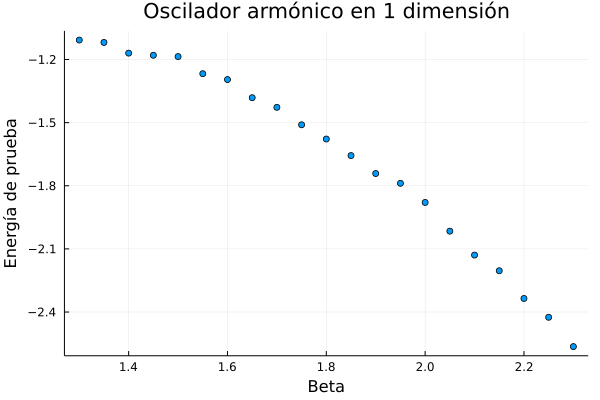

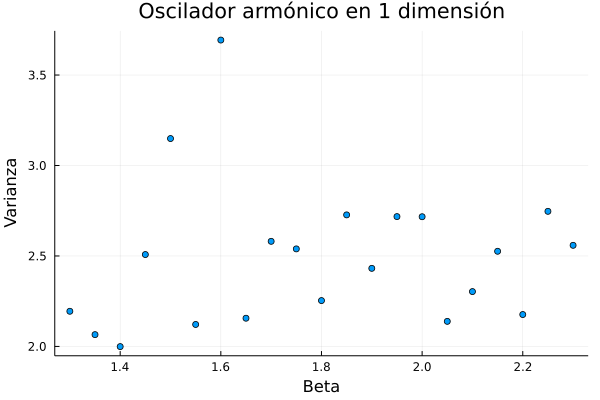

alpha min = 1.4
E min = -1.169603307173664 +/- 0.014138970149322808
Var min = 1.9991047688344143


In [3]:
helio(10000)